In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
filepath=r"D:\powerbi customer churn analysis\Data\PredictiveData.xlsx"
sheet_name='vw_customerchurn'
data=pd.read_excel(filepath,sheet_name=sheet_name)

print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12       None           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

### DATA PREPROCESSING


In [4]:
data=data.drop(['Customer_ID', 'Churn_Category','Churn_Reason'],axis=1)

In [5]:
data.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6007.0,47.289163,16.805110,18.000000,33.000000,47.000000,60.000000,84.000000
Number_of_Referrals,6007.0,7.439820,4.622369,0.000000,3.000000,7.000000,11.000000,15.000000
Tenure_in_Months,6007.0,17.394540,10.592920,1.000000,8.000000,17.000000,27.000000,36.000000
Monthly_Charge,6007.0,65.087598,31.067808,-10.000000,35.950001,71.099998,90.449997,118.750000
Total_Charges,6007.0,2430.986173,2267.481295,19.100000,539.949982,1556.849976,4013.900024,8684.799805
Total_Refunds,6007.0,2.038612,8.065520,0.000000,0.000000,0.000000,0.000000,49.790001
Total_Extra_Data_Charges,6007.0,7.015149,25.405737,0.000000,0.000000,0.000000,0.000000,150.000000
Total_Long_Distance_Charges,6007.0,797.283311,854.858840,0.000000,107.084999,470.220001,1269.839966,3564.719971
Total_Revenue,6007.0,3233.246020,2856.181081,21.610001,833.684998,2367.149902,5105.685059,11979.339844


In [9]:
columnsToEncode=['Gender', 'State','Married', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method'
       ]

In [10]:
Label_encoder={}
for column in columnsToEncode:
    Label_encoder[column]=LabelEncoder()
    data[column]=Label_encoder[column].fit_transform(data[column])

    

In [11]:
Label_encoder

{'Gender': LabelEncoder(),
 'State': LabelEncoder(),
 'Married': LabelEncoder(),
 'Value_Deal': LabelEncoder(),
 'Phone_Service': LabelEncoder(),
 'Multiple_Lines': LabelEncoder(),
 'Internet_Service': LabelEncoder(),
 'Internet_Type': LabelEncoder(),
 'Online_Security': LabelEncoder(),
 'Online_Backup': LabelEncoder(),
 'Device_Protection_Plan': LabelEncoder(),
 'Premium_Support': LabelEncoder(),
 'Streaming_TV': LabelEncoder(),
 'Streaming_Movies': LabelEncoder(),
 'Streaming_Music': LabelEncoder(),
 'Unlimited_Data': LabelEncoder(),
 'Contract': LabelEncoder(),
 'Paperless_Billing': LabelEncoder(),
 'Payment_Method': LabelEncoder()}

In [12]:
data['Customer_Status']=data['Customer_Status'].map({'Stayed':0,'Churned':1})

In [15]:
X=data.drop('Customer_Status',axis=1)
y=data['Customer_Status']

In [16]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
ranforest_model=RandomForestClassifier(n_estimators=100,random_state=42)
ranforest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred=ranforest_model.predict(X_test)


In [20]:
print("confusion_matrix")
print(confusion_matrix(y_test,y_pred))
print("\n Classification Report :")
print(classification_report(y_test,y_pred))

confusion_matrix
[[783  64]
 [126 229]]

 Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [21]:
importance=ranforest_model.feature_importances_
indices=np.argsort(importance)[::-1]


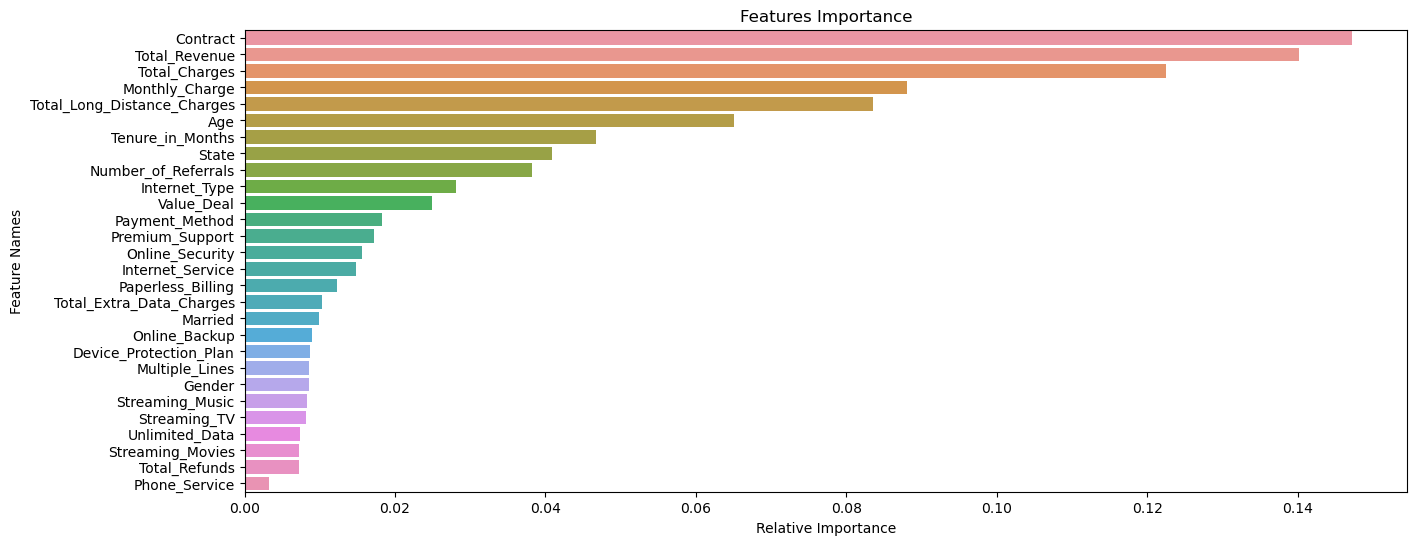

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x=importance[indices],y=X.columns[indices])
plt.title('Features Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [24]:
file_path=r"D:\powerbi customer churn analysis\Data\PredictiveData.xlsx"
sheet_name='vw_JoinData'
df=pd.read_excel(filepath,sheet_name=sheet_name)

df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,None,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,None,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,None,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,None,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others


In [25]:
original_data=df.copy()

In [28]:
customer_ids=df['Customer_ID']
df=df.drop(['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'],axis=1)

In [29]:
for column in df.select_dtypes(include=['object']).columns:
    df[column]=Label_encoder[column].transform(df[column])
    

In [30]:
prediction=ranforest_model.predict(df)


In [31]:
original_data['Customer_Status_Predicted']=prediction

In [32]:
original_data=original_data[original_data['Customer_Status_Predicted']==1]

In [33]:
original_data.to_csv(r"D:\powerbi customer churn analysis\Data\Predictive.csv")